In [1]:
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy import stats

from gurobi_implementation import GurobiSolution
from data_market import Seller, MarketOperator, Market, Buyer
from p2p_gurobi import Agents, FirstStageMarket

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

## Data market

In [3]:
#reading data from csv

probabilities = pd.read_csv('df_probabilities_100.csv')
probabilities = probabilities['0'].to_list()

g_res = pd.read_csv('df_g_res_100.csv')
generation = g_res.drop('Unnamed: 0', axis = 1).loc[0].to_list()

In [4]:
g_res

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,0.0,0.05545,0.11090,0.16635,0.22180,0.27725,0.33270,0.38815,0.44360,...,4.9905,5.04595,5.10140,5.15685,5.21230,5.26775,5.32320,5.37865,5.43410,5.48955
1,1,0.0,0.04707,0.09414,0.14121,0.18828,0.23535,0.28242,0.32949,0.37656,...,4.2363,4.28337,4.33044,4.37751,4.42458,4.47165,4.51872,4.56579,4.61286,4.65993
2,2,0.0,0.04556,0.09112,0.13668,0.18224,0.22780,0.27336,0.31892,0.36448,...,4.1004,4.14596,4.19152,4.23708,4.28264,4.32820,4.37376,4.41932,4.46488,4.51044
3,3,0.0,0.05004,0.10008,0.15012,0.20016,0.25020,0.30024,0.35028,0.40032,...,4.5036,4.55364,4.60368,4.65372,4.70376,4.75380,4.80384,4.85388,4.90392,4.95396
4,4,0.0,0.04522,0.09044,0.13566,0.18088,0.22610,0.27132,0.31654,0.36176,...,4.0698,4.11502,4.16024,4.20546,4.25068,4.29590,4.34112,4.38634,4.43156,4.47678
5,5,0.0,0.04698,0.09396,0.14094,0.18792,0.23490,0.28188,0.32886,0.37584,...,4.2282,4.27518,4.32216,4.36914,4.41612,4.46310,4.51008,4.55706,4.60404,4.65102
6,6,0.0,0.05026,0.10052,0.15078,0.20104,0.25130,0.30156,0.35182,0.40208,...,4.5234,4.57366,4.62392,4.67418,4.72444,4.77470,4.82496,4.87522,4.92548,4.97574
7,7,0.0,0.03832,0.07664,0.11496,0.15328,0.19160,0.22992,0.26824,0.30656,...,3.4488,3.48712,3.52544,3.56376,3.60208,3.64040,3.67872,3.71704,3.75536,3.79368
8,8,0.0,0.04590,0.09180,0.13770,0.18360,0.22950,0.27540,0.32130,0.36720,...,4.1310,4.17690,4.22280,4.26870,4.31460,4.36050,4.40640,4.45230,4.49820,4.54410
9,9,0.0,0.04933,0.09866,0.14799,0.19732,0.24665,0.29598,0.34531,0.39464,...,4.4397,4.48903,4.53836,4.58769,4.63702,4.68635,4.73568,4.78501,4.83434,4.88367


In [5]:
agent_keys = [661, 1642, 2335, 2361, 2818, 3039, 3456, 3538, 4031, 4373, 4767, 5746, 6139, 7536, 7719, 7800, 7901, 7951, 8156, 8386, 8565, 9019, 9160, 9922, 9278]

dataframe_dict = dict()
for key in agent_keys:
    dataframe_dict.update({key : pd.read_csv('/Users/ishilov/Documents/risk_paper/risk_paper/data/df_{}.csv'.format(key))})

community_size = len(dataframe_dict)

for key in agent_keys:
    cond_min = (dataframe_dict[key]['demand'].quantile(0.01) <= dataframe_dict[key]['demand'])
    cond_max = (dataframe_dict[key]['demand'] <= dataframe_dict[key]['demand'].quantile(0.99))
    dataframe_dict[key] = dataframe_dict[key][cond_min & cond_max]

In [6]:
def distribution_build(sample_size, agent_keys):
    res = {}
    
    for key in agent_keys:
        probas_demand, values_demand = np.histogram(dataframe_dict[key]['demand'], bins = sample_size, density=True)
        probas_demand = probas_demand / probas_demand.sum()
        distribution_demand = stats.rv_histogram([probas_demand, values_demand])

        if 'solar' in dataframe_dict[key].columns:
            data = dataframe_dict[key][dataframe_dict[key]['solar'] >= 0]['solar']
            probas_solar, values_solar = np.histogram(data, bins = sample_size, density=True)
            probas_solar = probas_solar / probas_solar.sum()
            distribution_solar = stats.rv_histogram([probas_solar, values_solar])

        res.update({key : 
                    {'probas_demand' : probas_demand,
                    'values_demand' : values_demand,
                    'probas_solar' : probas_solar,
                    'values_solar' : values_solar,
                    'distribution_demand' : distribution_demand,
                    'distribution_solar' : distribution_solar}})

    return res 

In [7]:
distributions = distribution_build(100, agent_keys)
distributions_solar = {key : distributions[key]['distribution_solar'] for key in agent_keys}

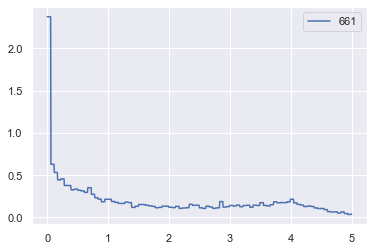

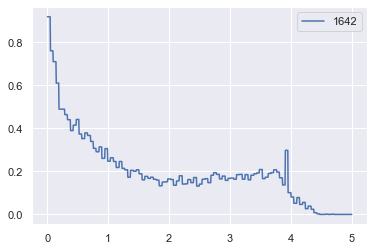

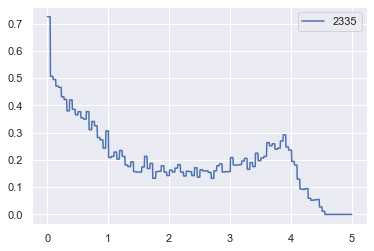

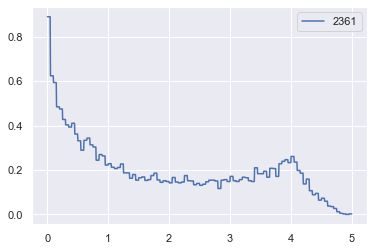

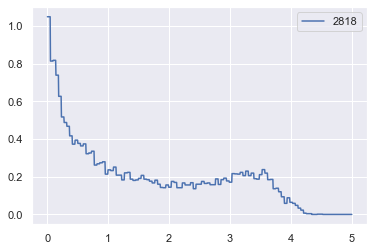

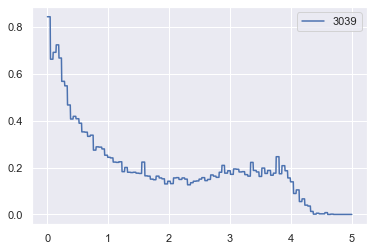

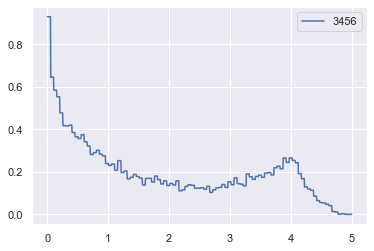

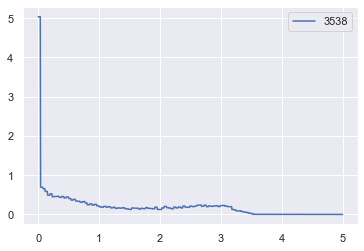

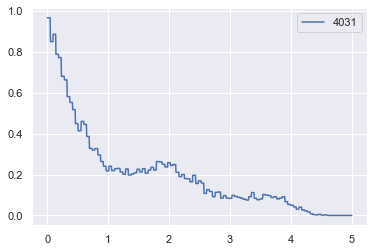

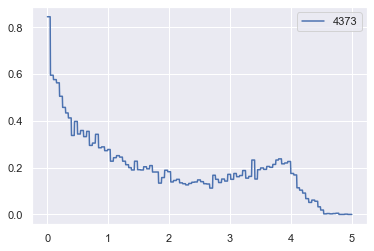

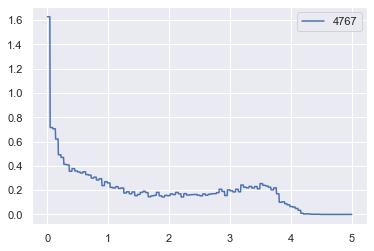

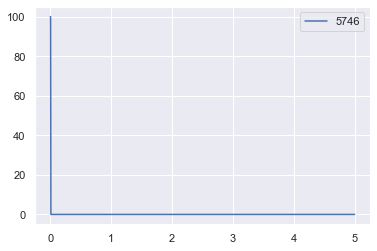

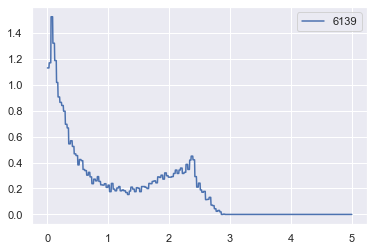

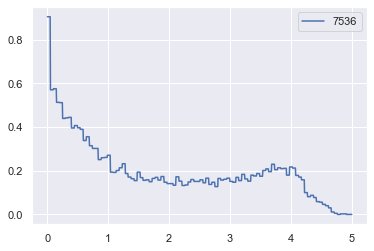

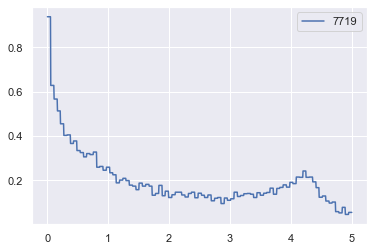

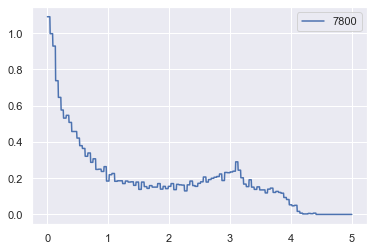

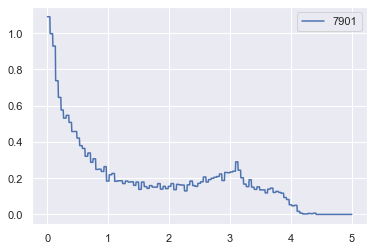

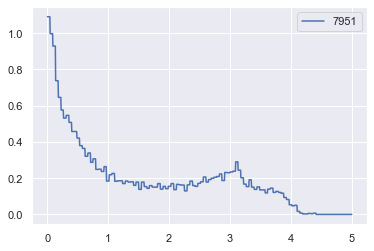

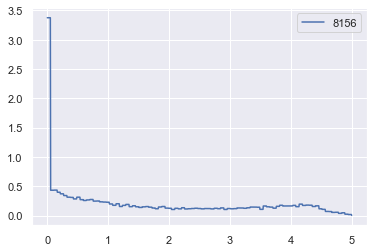

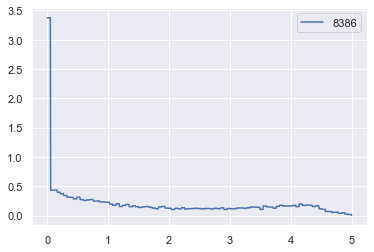

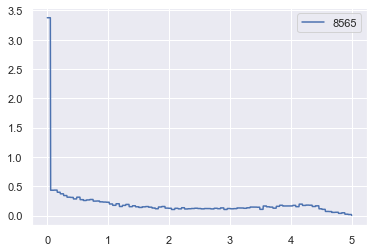

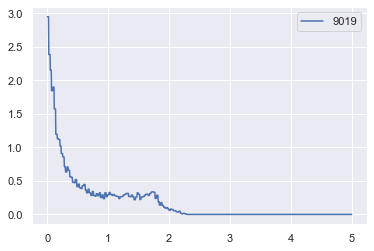

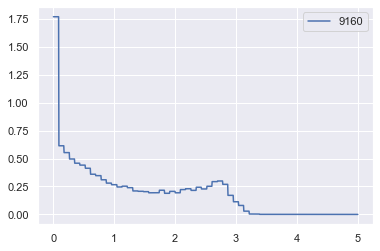

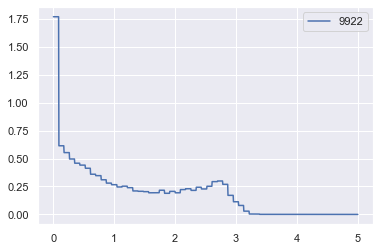

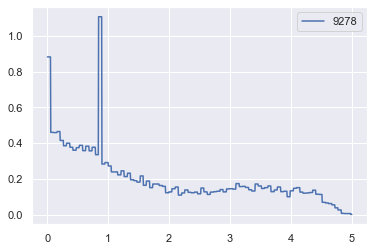

In [8]:
support = np.linspace(0,5, 1000)

for key in agent_keys:
    plt.plot(support, distributions_solar[key].pdf(support), label = key)
    plt.legend()
    plt.show()

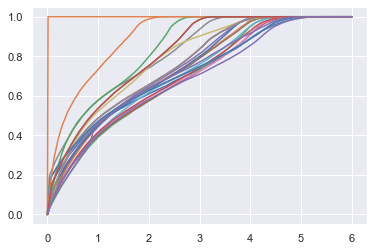

In [9]:
support = np.linspace(0,6, 1000)

for key in agent_keys:
    plt.plot(support, distributions_solar[key].cdf(support), label = key)
    #plt.plot(support, distributions_solar_2[key].cdf(support), label = key)
    #plt.legend()

plt.show()

In [10]:
sellers = [Seller(distributions[key]['probas_solar'], distributions[key]['values_solar'], wager = 1) for key in agent_keys[:-1] if key != 5746]
task = 1.7136738749507794

In [11]:
buyer = Buyer(distributions[agent_keys[-2]]['probas_solar'], distributions[agent_keys[-1]]['values_solar'], utility = 1)

In [12]:
market_1 = Market(sellers, buyer, task = task)

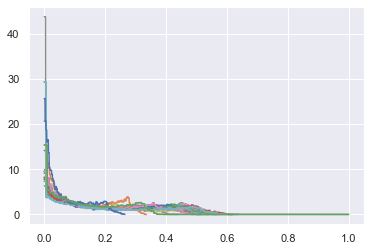

In [13]:
market_1.plot_scaled_forecasts()

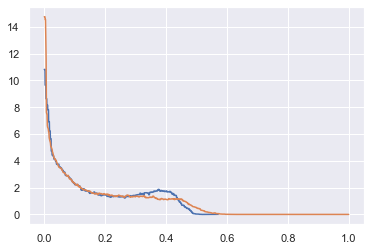

In [14]:
qa_forecast_scaled = market_1.scaled_aggregation(type = 'QA', plot = True)
lop_forecast_scaled = market_1.scaled_aggregation(type = 'LOP', plot = True)

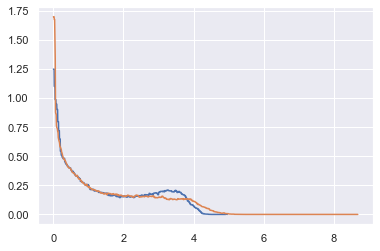

In [15]:
qa_forecast = market_1.aggregation(type = 'QA', plot = True)
lop_forecast = market_1.aggregation(type = 'LOP', plot = True)

In [16]:
market_1.make_scaling()

In [17]:
market_1.calculate_payoffs()

[0.99726577 1.00634224 1.00643911 1.00373637 1.00563966 1.00486774
 1.00314981 0.99297621 1.00435484 1.00715442 1.00549725 0.9961157
 1.00473815 1.00110597 1.00317289 1.00317289 1.00317289 0.99649822
 0.99649822 0.99649822 0.9588947  1.00135437 1.00135437]
[0.04523367 0.04566924 0.04567389 0.04554419 0.04563553 0.04559848
 0.04551604 0.04502781 0.04557387 0.04570822 0.04562869 0.04517847
 0.04559226 0.04541796 0.04551715 0.04551715 0.04551715 0.04519683
 0.04519683 0.04519683 0.         0.04542988 0.04542988]


array([ 0.04249944,  0.05201148,  0.052113  ,  0.04928055,  0.05127518,
        0.05046622,  0.04866584,  0.03800402,  0.0499287 ,  0.05286264,
        0.05112594,  0.04129418,  0.05033042,  0.04652392,  0.04869003,
        0.04869003,  0.04869003,  0.04169505,  0.04169505,  0.04169505,
       -0.0411053 ,  0.04678425,  0.04678425])

In [18]:
market_1.score_dict

{'Seller #0': 0.9425683845763021,
 'Seller #1': 0.951644850423664,
 'Seller #2': 0.9517417220503017,
 'Seller #3': 0.9490389797914743,
 'Seller #4': 0.950942269632934,
 'Seller #5': 0.9501703497027271,
 'Seller #6': 0.9484524181575386,
 'Seller #7': 0.9382788212937743,
 'Seller #8': 0.9496574495980462,
 'Seller #9': 0.9524570320485266,
 'Seller #10': 0.9507998647023873,
 'Seller #11': 0.9414183164058187,
 'Seller #12': 0.9500407670001835,
 'Seller #13': 0.9464085805445028,
 'Seller #14': 0.9484754982930905,
 'Seller #15': 0.9484754982930905,
 'Seller #16': 0.9484754982930905,
 'Seller #17': 0.9418008368937152,
 'Seller #18': 0.9418008368937152,
 'Seller #19': 0.9418008368937152,
 'Seller #20': 0.9041973171794175,
 'Seller #21': 0.9466569835261405,
 'Seller #22': 0.9466569835261405}

In [19]:
market_1.buyers_score

0.9178766401758701

## Peer-to-peer electricity market

In [20]:
def text_to_adj_matrix(matrix_path):
    res = []
    with open(matrix_path) as file:
        for s in file:
            string = ''.join(s.strip().strip(',').split(', '))
            lst_temp = [int(sym) for sym in string]

            res.append(lst_temp)

    return res

In [21]:
connection_matrix = text_to_adj_matrix('./matrices/matrix_2.txt')

In [22]:
Kappa = [[10 if i!=j else 0 for i in range(community_size)] for j in range(community_size)]

In [23]:
demand = [8, 8, 9, 7, 8, 7, 7, 9, 9, 8, 8, 6, 9, 6, 8, 6, 7, 9, 7, 6, 8, 7, 7, 8, 6]

In [24]:
price_da_buy = 3
price_da_sell = 2
price_rt_buy = 4
price_rt_sell = 1

In [25]:
myclip_a = 0
myclip_b = 10
my_scale = 5.0

means_base_forecasts = [0.8045670270776432,
                        1.013315729602517,
                        2.0284857954454707,
                        1.7236086139928533,
                        0.9281422425924236,
                        1.5556687075573468,
                        1.242477100535213,
                        1.4571803040470759,
                        1.6742950501106706,
                        1.5738517232502214,
                        1.699506159188794,
                        0.2405423035568037,
                        1.5258808003369477,
                        1.6408779364595203,
                        2.3044433411181995,
                        2.1905783675037593,
                        1.4433559888096898,
                        0.9463246169038547,
                        2.111857347190762,
                        1.599330231524489,
                        1.925669117842285,
                        1.7530069905258472,
                        1.8120144586989713,
                        0.7283821698186553,
                        1.6283037307914494]

def scale_parameters(myclip_a, myclip_b, my_mean, my_std):
    a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std

    return a,b

base_forecasts = [stats.truncnorm(loc = mean, 
                                scale = my_scale, 
                                a = scale_parameters(myclip_a, myclip_b, mean, my_scale)[0], 
                                b = scale_parameters(myclip_a, myclip_b, mean, my_scale)[1]) for mean in means_base_forecasts]

#base_forecasts = [stats.uniform(loc = 0, 
#                               scale = 7) for mean in means_base_forecasts]

agents_forecasts = []
for base_forecast in base_forecasts:
    probas, values = np.histogram(base_forecast.rvs(100000), bins = 100, density = True)
    probas = probas / probas.sum()
    agents_forecasts.append((probas, values))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


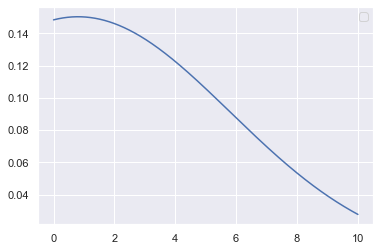

In [26]:
support = np.linspace(0,10, 1000)

plt.plot(support, base_forecasts[0].pdf(support))
plt.legend()
plt.show()

In [27]:
def second_stage_resolution(model, agents, actual_generations):
    second_stage_decisions = []
    actual_costs = []
    for agent in agents:
        second_stage_decision = (agent.demand 
                                - actual_generations[agent.id] 
                                - model.getVarByName(f'Agent {agent.id} day-ahead purchase').X
                                + model.getVarByName(f'Agent {agent.id} day-ahead sale').X
                                - model.getVarByName(f'Agent {agent.id} net trading').X)

        second_stage_cost = price_rt_buy * second_stage_decision if second_stage_decision > 0 else price_rt_sell * second_stage_decision

        second_stage_decisions.append(second_stage_decision)

        actual_cost = (price_da_buy * model.getVarByName(f'Agent {agent.id} day-ahead purchase').X 
                    - price_da_sell * model.getVarByName(f'Agent {agent.id} day-ahead sale').X
                    + second_stage_cost)


        actual_costs.append(actual_cost)

    return second_stage_decisions, actual_costs

In [28]:
def corrected_trading_costs(agents, model, price_da_buy):
    res = []
    for agent in agents:
        agent_trading_cost = 0
        for agent_2 in agents:
            if agent.connections[agent_2.id]:
                agent_trading_cost += price_da_buy * model.getVarByName(f'q_{agent.id}_{agent_2.id}').X

        res.append(agent_trading_cost)

    return res

In [29]:
def overall_costs(agents, model, price_da_buy, actual_generations):
    return np.array(second_stage_resolution(model, agents, actual_generations)[1]) + np.array(corrected_trading_costs(agents, model, price_da_buy))

In [30]:
buys_forecast = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
diff = []
diff_sum = []
sellers_payoffs = []
scores = []

for i in range(100):
    sellers = [Seller(distributions[key]['probas_solar'], distributions[key]['values_solar'], wager = 1) for key in agent_keys]
    buyer = Buyer(agents_forecasts[0][0],agents_forecasts[0][1], utility = 1)    

    actual_generations = [sellers[id].forecast_rv().rvs() for id in range(len(sellers))]

    task = actual_generations[0]

    market_1 = Market(sellers, buyer, task = task)
    market_1.make_scaling()
    sellers_payoffs.append(market_1.calculate_payoffs()[1])
    scores.append(market_1.score_dict)

    qa_forecast_scaled = market_1.scaled_aggregation(type = 'QA', plot = False)

    agents = []
    for id in range(community_size):
        agent = Agents(id = id,
                    probabilities = agents_forecasts[id][0],
                    generation_values = agents_forecasts[id][1],
                    demand = demand[id],
                    connections = connection_matrix[id],
                    kappa = Kappa[id])

        agents.append(agent)

    model_1 = gp.Model()

    market_1 = FirstStageMarket(agents= agents,
                            model = model_1,
                            price_da_buy = price_da_buy,
                            price_da_sell = price_da_sell,
                            price_rt_buy = price_rt_buy,
                            price_rt_sell = price_rt_sell)

    market_1.build_model()
    model_1.optimize()

    for id in range(community_size):
        if buys_forecast[id]:
            probas, values = np.histogram(qa_forecast_scaled.rvs(100000), bins = 100, density = True)
            probas = probas / probas.sum()
            agents[id].probabilities = probas
            agents[id].generation_values = values

    model_2 = gp.Model()

    market_2 = FirstStageMarket(agents= agents,
                                model = model_2,
                                price_da_buy = price_da_buy,
                                price_da_sell = price_da_sell,
                                price_rt_buy = price_rt_buy,
                                price_rt_sell = price_rt_sell)

    market_2.build_model()
    model_2.optimize()

    diff_temp = overall_costs(agents, model_2, price_da_buy, actual_generations) - overall_costs(agents, model_1, price_da_buy, actual_generations)
    diff.append(diff_temp)
    diff_sum.append(diff_temp.sum())

[0.99443219 0.99931718 0.98534441 0.98575904 1.00190433 0.999272
 0.98909201 1.01883883 1.01575286 0.99271223 0.99900238 0.94267229
 1.02327515 0.99006482 0.98488596 1.00584229 1.00584229 1.00584229
 0.99681772 0.99681772 0.99681772 1.03618227 1.01783752 1.01783752
 0.99783699]
[0.03976736 0.03997147 0.03938764 0.03940496 0.04007957 0.03996958
 0.03954423 0.04078715 0.04065821 0.03969549 0.03995832 0.03760465
 0.04097251 0.03958487 0.03936848 0.04024411 0.04024411 0.04024411
 0.03986703 0.03986703 0.03986703 0.04151182 0.04074531 0.04074531
 0.03990962]
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2573 rows, 5123 columns and 12669 nonzeros
Model fingerprint: 0xdfe15467
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 3e+00]
  Bounds range     [1e+01, 1e+01]
  RHS range        [1e-05, 9e+00]
Presolve removed 63 rows and 39 columns
Presolve 

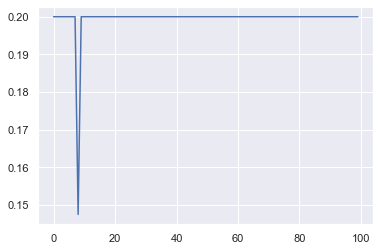

In [31]:
plt.plot(diff_sum)